# Superstore-Datenanalyse nach IBCS-Standards
Dieses Notebook analysiert den *Superstore*-Datensatz und visualisiert eine klare Kernaussage basierend auf Produktgewinnen. Die Darstellung folgt dem IBCS-Prinzip und hebt eine bestimmte Produktgruppe hervor.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Direktlink zur CSV-Datei (ersetze mit deinem Link)
csv_url = "https://github.com/alendoko/bina/raw/refs/heads/main/LB1/DATA/Sample%20-%20Superstore.csv"

# Datei direkt aus der URL laden
df = pd.read_csv(csv_url, encoding="ISO-8859-1")

# Erste Zeilen anzeigen, um die Daten zu überprüfen
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [6]:
# Relevante Spalten auswählen und bereinigen
df = df[['Product Name', 'Category', 'Sub-Category', 'Sales', 'Profit']].dropna()

# Beispiel: Produktlinie mit hohem Gewinn identifizieren
selected_category = 'Technology'  # Beispiel-Kategorie
df_selected = df[df['Category'] == selected_category]

# Gewinnsegment definieren (oberste 10%)
high_profit_threshold = df_selected['Profit'].quantile(0.9)
df_high_profit = df_selected[df_selected['Profit'] >= high_profit_threshold]

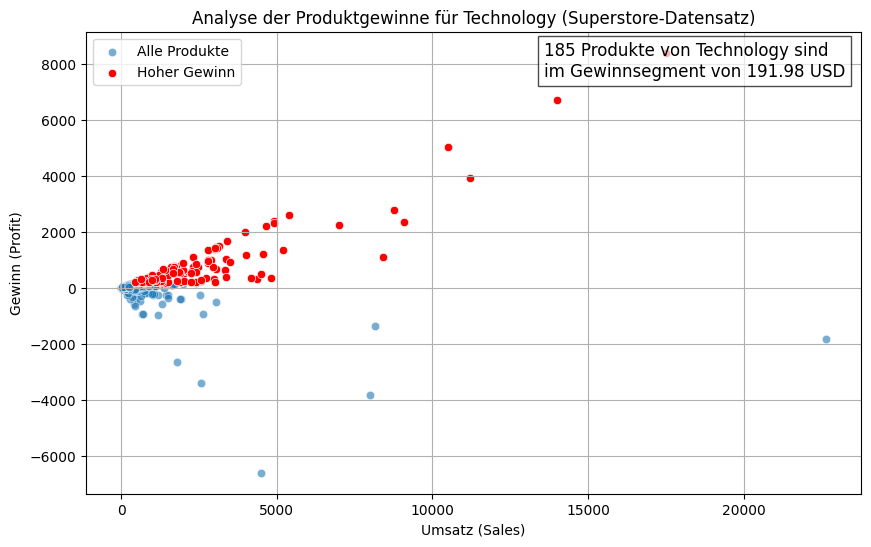

In [7]:
# Scatter-Plot mit Kernaussage erstellen
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_selected['Sales'], y=df_selected['Profit'], alpha=0.6, label='Alle Produkte')

# Produkte mit hohem Gewinn markieren
sns.scatterplot(x=df_high_profit['Sales'], y=df_high_profit['Profit'], color='red', label='Hoher Gewinn')

# Nachricht hinzufügen (analog zum IBCS-Bild)
message_text = f"{len(df_high_profit)} Produkte von {selected_category} sind\nim Gewinnsegment von {round(high_profit_threshold, 2)} USD"
plt.text(x=df_selected['Sales'].max() * 0.6,
         y=df_selected['Profit'].max() * 0.9,
         s=message_text,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.7))

# Achsentitel setzen
plt.xlabel('Umsatz (Sales)')
plt.ylabel('Gewinn (Profit)')
plt.title(f'Analyse der Produktgewinne für {selected_category} (Superstore-Datensatz)')
plt.legend()
plt.grid(True)

# Visualisierung anzeigen
plt.show()